In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Template

In [4]:
template_file = os.path.join('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190224_anatomy_central', 'meanbrain1', 'JFRCtemplate2010.nii')
template = bbb.load_numpy_brain(template_file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 521.50 ms


In [5]:
# Flip Z-axis
template = template[:,:,::-1]

In [6]:
# Cut off optic lobes
template = template[200:800,:,:]

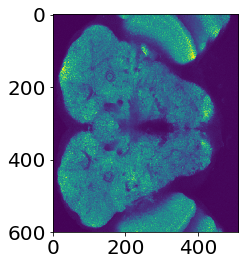

In [7]:
plt.imshow(template[:,:,80])

In [8]:
# Set resolution
template = ants.from_numpy(template)
ants.set_spacing(template, (0.622, 0.622, 0.622))

In [9]:
template

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (600, 512, 218)
	 Spacing    : (0.622, 0.622, 0.622)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

# Load individual anatomy

In [10]:
fly_folders = [os.path.join(root_directory,x) for x in os.listdir(root_directory) if 'fly' in x]
bbb.sort_nicely(fly_folders)
fly_folders = fly_folders[::-1]
anatomy = {}
for fly in fly_folders:
    anat_folders = []
    anat_folders = [os.path.join(fly,x) for x in os.listdir(fly) if 'anat' in x]
    if len(anat_folders) > 0:
        for anat_folder in anat_folders:
            fly_num = os.path.split(fly)[-1]
            anat_num = os.path.split(anat_folder)[-1]
            this_anat = '{},{}'.format(fly_num, anat_num)
            if this_anat == 'fly_12,anat_0':
                anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anat_mean.nii'))
                print('Loaded SPECIAL {}'.format(this_anat))
                continue
            try:
                anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy_channel_1.nii'))
                print('Loaded {}'.format(this_anat))
            except:
                print('failed to load anatomy_channel_1.nii: {}'.format(this_anat))
                try:
                    anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy.nii'))
                except:
                    print('failed to load anatomy.nii: {}'.format(this_anat))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 207.27 ms
Loaded fly_72,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 213.47 ms
Loaded fly_71,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 230.95 ms
Loaded fly_70,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 258.86 ms
Loaded fly_69,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 256.67 ms
Loaded fly_68,anat_1

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 206.89 ms
Loaded fly_68,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 186.82 ms
Loaded fly_67,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 187.69 ms
Loaded fly_66,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 189.29 ms
Loaded fly_65,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 156.32 ms
Loaded fly_64,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 204.36 ms
Loaded fly_63,anat_1

~~ load_numpy_brain ~~
load_num

load_numpy_brain done. Duration: 214.84 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_4,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 177.31 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_3,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 360.69 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_2,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 225.77 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_1,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 262.41 ms


In [11]:
for i,anat in enumerate(anatomy):
    print('{}, {}'.format(i, anat))

0, fly_72,anat_0
1, fly_71,anat_0
2, fly_70,anat_0
3, fly_69,anat_0
4, fly_68,anat_1
5, fly_68,anat_0
6, fly_67,anat_0
7, fly_66,anat_0
8, fly_65,anat_0
9, fly_64,anat_0
10, fly_63,anat_1
11, fly_63,anat_0
12, fly_61,anat_0
13, fly_60,anat_0
14, fly_59,anat_0
15, fly_58,anat_0
16, fly_57,anat_1
17, fly_57,anat_0
18, fly_56,anat_1
19, fly_56,anat_0
20, fly_56,anat_2
21, fly_55,anat_0
22, fly_54,anat_0
23, fly_53,anat_0
24, fly_52,anat_0
25, fly_51,anat_0
26, fly_49,anat_0
27, fly_48,anat_0
28, fly_47,anat_0
29, fly_46,anat_0
30, fly_45,anat_0
31, fly_44,anat_0
32, fly_43,anat_0
33, fly_42,anat_0
34, fly_40,anat_0
35, fly_39,anat_1
36, fly_39,anat_0
37, fly_38,anat_1_1
38, fly_38,anat_0_1
39, fly_38,anat_0_0
40, fly_38,anat_1_0
41, fly_37,anat_0
42, fly_37,anat_2
43, fly_36,anat_0
44, fly_35,anat_0
45, fly_34,anat_0
46, fly_33,anat_1
47, fly_33,anat_0
48, fly_30,anat_1
49, fly_30,anat_0
50, fly_29,anat_1
51, fly_29,anat_0
52, fly_28,anat_0
53, fly_27,anat_0
54, fly_26,anat_0
55, fly_25,a

fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (

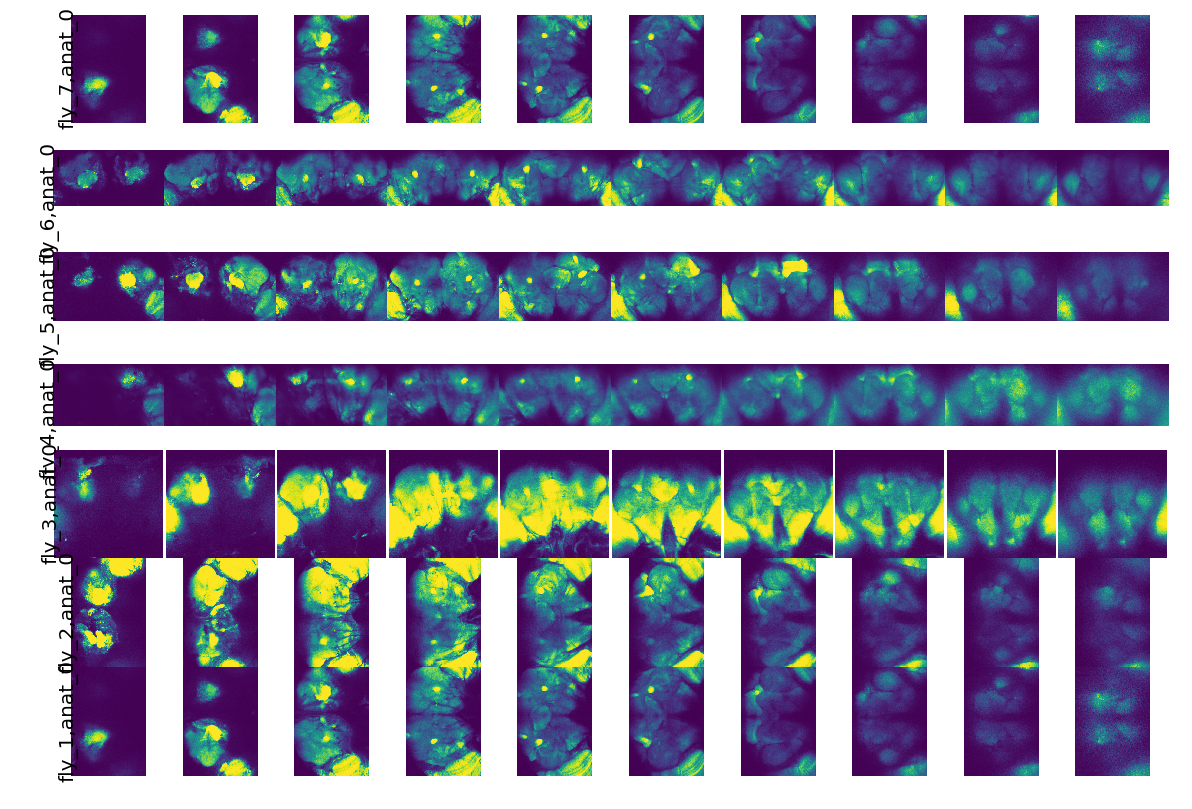

In [17]:
plt.figure(figsize=(20,20))
num_brains = 10
num_slices = 10
i=0
for k,anat in enumerate(anatomy):
    if 70 <= k < 80:
        #print('i: {}'.format(i))
        slices = np.linspace(0,anatomy[anat].shape[-1],10,dtype=int,endpoint=False)
        for j,z in enumerate(slices):
            if anat in ['fly_8,anat_0','fly_9,anat_0']:
                continue
            if j == 1:
                plt.text(-60,30,anat,rotation=90)
            #print('j: {}'.format(j))
            #print('z: {}'.format(z))
            #print('plt num: {}'.format(j+i))
            plt.subplot(num_brains, num_slices, j+(i*10)+1)
            print('{} {}'.format(anat,np.shape(anatomy[anat])))

            plt.imshow(anatomy[anat][:,:,z].T)
            plt.axis('off')
        i+=1
        
plt.subplots_adjust(wspace=0, hspace=0)
fig_folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = timestr + '_' + 'anat_8.png'
fname = os.path.join(fig_folder, fname)
plt.savefig(fname,dpi=200,bbox_inches='tight')

### Remove bad brains and non-central brains etc

In [12]:
to_remove = ['fly_64,anat_0',
             'fly_55,anat_0',
             'fly_46,anat_0',
             'fly_45,anat_0',
             'fly_44,anat_0',
             'fly_43,anat_0',
             'fly_40,anat_0',
             'fly_39,anat_0',
             'fly_39,anat_1',
             'fly_38,anat_0_0',
             'fly_38,anat_0_1',
             'fly_38,anat_1_0',
             'fly_38,anat_1_1',
             'fly_37,anat_2',
             'fly_36,anat_0',
             'fly_35,anat_0',
             'fly_34,anat_0',
             'fly_33,anat_0',
             'fly_30,anat_1',
             'fly_29,anat_1',
             'fly_20,anat_0',
             'fly_18,anat_0',
             'fly_16,anat_0',
             'fly_12,anat_0',
             'fly_10,anat_0',
             'fly_9,anat_0',
             'fly_8,anat_0']

In [13]:
for k in to_remove:
    anatomy.pop(k, None)

In [14]:
anatomy.keys()

dict_keys(['fly_72,anat_0', 'fly_71,anat_0', 'fly_70,anat_0', 'fly_69,anat_0', 'fly_68,anat_1', 'fly_68,anat_0', 'fly_67,anat_0', 'fly_66,anat_0', 'fly_65,anat_0', 'fly_63,anat_1', 'fly_63,anat_0', 'fly_61,anat_0', 'fly_60,anat_0', 'fly_59,anat_0', 'fly_58,anat_0', 'fly_57,anat_1', 'fly_57,anat_0', 'fly_56,anat_1', 'fly_56,anat_0', 'fly_56,anat_2', 'fly_54,anat_0', 'fly_53,anat_0', 'fly_52,anat_0', 'fly_51,anat_0', 'fly_49,anat_0', 'fly_48,anat_0', 'fly_47,anat_0', 'fly_42,anat_0', 'fly_37,anat_0', 'fly_33,anat_1', 'fly_30,anat_0', 'fly_29,anat_0', 'fly_28,anat_0', 'fly_27,anat_0', 'fly_26,anat_0', 'fly_25,anat_0', 'fly_24,anat_0', 'fly_23,anat_0', 'fly_22,anat_0', 'fly_21,anat_0', 'fly_19,anat_0', 'fly_17,anat_0', 'fly_15,anat_0', 'fly_14,anat_0', 'fly_13,anat_0', 'fly_7,anat_0', 'fly_6,anat_0', 'fly_5,anat_0', 'fly_4,anat_0', 'fly_3,anat_0', 'fly_2,anat_0', 'fly_1,anat_0'])

### Rotate some brains to match

In [15]:
to_rotate = ['fly_7,anat_0', 'fly_2,anat_0', 'fly_1,anat_0']
for k in to_rotate:
    anatomy[k] = np.swapaxes(anatomy[k],0,1)

### Create Ants brains with correct pixel sizes

In [16]:
anatomy_ants = {}
for anat in anatomy:
    fly_num, anat_num = anat.split(',')
    anatomy_xml = os.path.join(root_directory, fly_num, anat_num, 'anatomy.xml')
    anatomy_ants[anat] = ants.from_numpy(anatomy[anat])
    anatomy_ants[anat].set_spacing(bbb.get_resolution(anatomy_xml))
    print('DONE: {}'.format(anat))

DONE: fly_72,anat_0
DONE: fly_71,anat_0
DONE: fly_70,anat_0
DONE: fly_69,anat_0
DONE: fly_68,anat_1
DONE: fly_68,anat_0
DONE: fly_67,anat_0
DONE: fly_66,anat_0
DONE: fly_65,anat_0
DONE: fly_63,anat_1
DONE: fly_63,anat_0
DONE: fly_61,anat_0
DONE: fly_60,anat_0
DONE: fly_59,anat_0
DONE: fly_58,anat_0
DONE: fly_57,anat_1
DONE: fly_57,anat_0
DONE: fly_56,anat_1
DONE: fly_56,anat_0
DONE: fly_56,anat_2
DONE: fly_54,anat_0
DONE: fly_53,anat_0
DONE: fly_52,anat_0
DONE: fly_51,anat_0
DONE: fly_49,anat_0
DONE: fly_48,anat_0
DONE: fly_47,anat_0
DONE: fly_42,anat_0
DONE: fly_37,anat_0
DONE: fly_33,anat_1
DONE: fly_30,anat_0
DONE: fly_29,anat_0
DONE: fly_28,anat_0
DONE: fly_27,anat_0
DONE: fly_26,anat_0
DONE: fly_25,anat_0
DONE: fly_24,anat_0
DONE: fly_23,anat_0
DONE: fly_22,anat_0
DONE: fly_21,anat_0
DONE: fly_19,anat_0
DONE: fly_17,anat_0
DONE: fly_15,anat_0
DONE: fly_14,anat_0
DONE: fly_13,anat_0
DONE: fly_7,anat_0
DONE: fly_6,anat_0
DONE: fly_5,anat_0
DONE: fly_4,anat_0
DONE: fly_3,anat_0
DONE:

In [31]:
slave = ants.n4_bias_field_correction(anatomy_ants['fly_25,anat_0'])

In [51]:
master = template
anatomy2template = {}
MI_before = {}
MI_after = {}

grad_steps = 0.2
flow_sigma = 10
total_sigma = 0
aff_sampling = 32
syn_sampling = 256
verbose = True

for grad_steps in [.05]:
    print('Working on {}'.format(anat))
    t0 = time.time()
    slave2master = ants.registration(master,
                                     slave,
                                     type_of_transform='SyN',
                                     syn_sampling=syn_sampling,
                                     flow_sigma=flow_sigma,
                                     total_sigma=total_sigma,
                                     grad_steps=grad_steps)
    anatomy2template[grad_steps] = slave2master
    #MI_after[anat] = ants.image_mutual_information(master,slave2master['warpedmovout'])
    print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

Working on fly_25,anat_0
COMPLETE. Duration: 363 sec


In [52]:
#folder = os.path.join(root_directory, '2019_nov_meanbrain_2')
#os.mkdir(folder)

for brain in anatomy2template:
    file = os.path.join(folder, 'grad_steps_{}.nii'.format(brain))
    bbb.save_brain(file, anatomy2template[brain]['warpedmovout'].numpy())


~~ save_brain ~~
Current memory usage: 33.27GB
save_brain done. Duration: 1.04 sec


In [17]:
master = template
anatomy2template = {}
MI_before = {}
MI_after = {}

for anat in ['fly_25,anat_0']:#anatomy_ants:
    print('Working on {}'.format(anat))
    t0 = time.time()
    slave = anatomy_ants[anat]
    #MI_before[anat] = ants.image_mutual_information(master,slave)
    slave2master = ants.registration(master,
                                     slave,
                                     type_of_transform='SyN')
    anatomy2template[anat] = slave2master#['warpedmovout']
    MI_after[anat] = ants.image_mutual_information(master,slave2master['warpedmovout'])
    print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

Working on fly_25,anat_0
COMPLETE. Duration: 325 sec


In [29]:
MI_after['fly_25,anat_0']

-0.5780067595028602

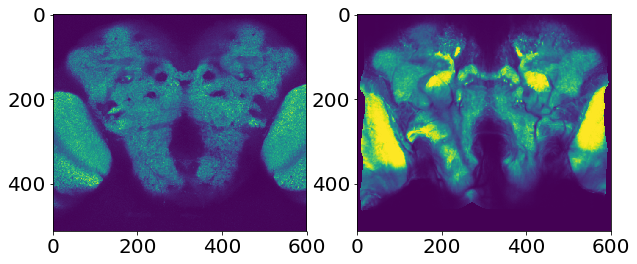

In [30]:
z = 50

plt.figure(figsize=(10,20))
ax1 = plt.subplot(121)
ax1.imshow(template.numpy()[:,:,z].T)
ax2 = plt.subplot(122)
ax2.imshow(anatomy2template['fly_25,anat_0']['warpedmovout'].numpy()[:,:,z].T)

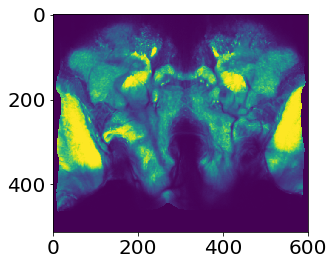

In [22]:
plt.imshow(anatomy2template['fly_25,anat_0']['warpedmovout'].numpy()[:,:,50].T)

### Save first round of alignment

In [28]:
#folder = os.path.join(root_directory, '2019_nov_meanbrain_2')
#os.mkdir(folder)

#for anat in anatomy2template:
file = os.path.join(folder, 'template_trim.nii')
bbb.save_brain(file, template.numpy())
#print('SAVED: {}'.format(anat))


~~ save_brain ~~
Current memory usage: 30.07GB
save_brain done. Duration: 932.98 ms


In [131]:
file = os.path.join(root_directory,
                   '2019_nov_meanbrain',
                   'affine_rnd1',
                   'mutual_info_after.npy')
np.save(file, MI_after)

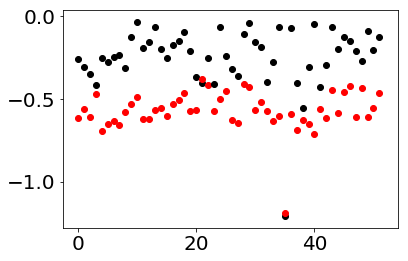

In [98]:
for i,anat in enumerate(MI_before):
    plt.scatter(i, MI_before[anat],color='k')
    plt.scatter(i, MI_after[anat],color='r')

### Average all aligned brains

In [99]:
brain_matrix = []
for anat in anatomy_affine_rnd1:
    brain_matrix.append(anatomy_affine_rnd1[anat].numpy())

In [107]:
medianbrain = np.median(brain_matrix,axis=0)

In [108]:
file = os.path.join(root_directory, '2019_nov_meanbrain', 'medianbrain_rnd1.nii')
bbb.save_brain(file, medianbrain)
#meanbrain


~~ save_brain ~~
Current memory usage: 52.04GB
save_brain done. Duration: 2.35 sec


In [123]:
meanbrain_smoothed = gaussian_filter(meanbrain, sigma=3)

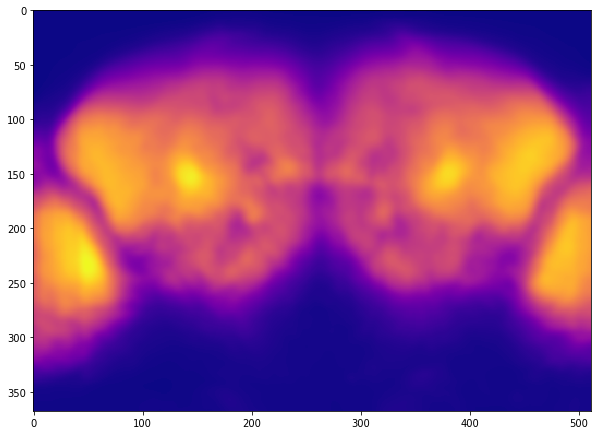

In [124]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain_smoothed[:,:,100].T,cmap='plasma')

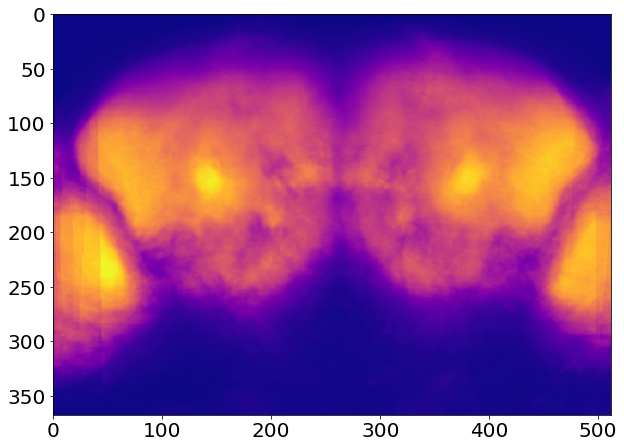

In [111]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain_smoothed[:,:,100].T,cmap='plasma')